# 'Homework' 12: Conditional Probability and General Review

This notebook won't be graded!  It contains exercises designed to help you review for the final exam.  To simulate exam conditions, consider printing it out and completing it in pencil.

Run the cell below to prepare the notebook.

In [1]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

## 1. Do Diet Drinks Cause Weight Gain?


[Betteridge's Law](https://en.wikipedia.org/wiki/Betteridge's_law_of_headlines) notwithstanding, this is a serious question and a subject of much recent research.  Though artificially-sweetened diet drinks (like Diet Pepsi or a cup of coffee with sucralose) contain no calories, it is theorized that drinking sweet diet drinks could increase cravings for other sweet food, or that the artificial sweeteners in diet drinks (like aspartame and sucralose) could directly cause weight gain.  [This article](http://www.vox.com/2016/11/28/13764656/diet-soda-metabolism-weight-loss-obesity) summarizes some of the recent research activity.

In this exercise we'll use bootstrap confidence intervals to replicate some of the analysis in [this study](http://onlinelibrary.wiley.com/doi/10.1038/oby.2008.284/full).  For simplicity (and because we couldn't get our hands on the data), we'll work with a synthetic dataset, not the dataset used in the actual study.

The original dataset is called the San Antonio Heart Study.  It tracks 3,371 people living in San Antonio, Texas, over 7-8 years.  For each person, it records (among many other things) how many diet drinks they reported drinking in a typical week, and the change in the person's Body Mass Index (BMI, a measure of weight adjusted for height) between the start and the end of the 7-8 year period.  A change of 1 in BMI means that the person gained around 4-8 pounds, depending on their height.

In [2]:
diet = Table.read_table("diet.csv")
diet

ID,Typical diet drinks per week,BMI change
0,6,-4.40065
1,0,0.952995
2,4,2.71019
3,6,-0.276764
4,0,6.12079
5,3,-0.158611
6,0,-2.94134
7,0,-2.64784
8,0,7.0943
9,7,1.69633


#### Question 1
We will crudely divide people into two categories: those who consume any diet drinks, and those who consume none.  Create a table called `drink_or_not` that's a copy of `diet`, with an extra column called `"Drink"`.  It should contain the value `True` for people who drank at least one drink per week and `False` otherwise.

In [5]:
drink_or_not = diet.with_column('Drink', diet[1]>0)
drink_or_not

ID,Typical diet drinks per week,BMI change,Drink
0,6,-4.40065,True
1,0,0.952995,False
2,4,2.71019,True
3,6,-0.276764,True
4,0,6.12079,False
5,3,-0.158611,True
6,0,-2.94134,False
7,0,-2.64784,False
8,0,7.0943,False
9,7,1.69633,True


#### Question 2
Compute a table called `means` that looks like this, but with the `"BMI change mean"` column filled in according to its name:

|Drink|BMI change mean|
|-|-|
|False|?|
|True|?|

In [7]:
means = drink_or_not.group('Drink', np.mean).select('Drink', 'BMI change mean')
means

Drink,BMI change mean
False,1.01925
True,1.50449


In [10]:
means[1]

array([ 1.01924844,  1.50448815])

You should find that diet drinkers have a higher average BMI change - they gained more weight on average.  (The average for both groups is positive because most people gain a little weight as they get older.)

#### Question 3
Suppose our `diet` table is a random sample from the population of all people who lived during this 7-8 year period.  We want to know whether drinking diet drinks really makes a difference in BMI change.  Formulate appropriate null and alternative hypotheses for an hypothesis test, **or** (if appropriate) explain why no hypothesis test is needed.

**Null hypothesis:** 喝饮料不会影响体重

**Alternative hypothesis:** 喝饮料会影响体重

#### Question 4
Test your hypothesis.  Use a method that gives you an idea of *how big* the difference is between the two groups, not just whether there is a difference.  To get the best practice, try to do it without consulting the textbook and without too much trial and error.  (It's very hard to write code exactly right the first time, so don't worry if you don't.)

In [33]:
# Hint: The staff solution took 8 lines of code (and then a bit
# to print the interval).
# 
# If you use 5,000 bootstrap repetitions, it should take around a
# minute.
result = np.array([])
for i in range(1000):
    temp = drink_or_not.sample(with_replacement=True)
    mean = temp.group('Drink', np.mean).select('Drink', 'BMI change mean')
    diff = mean[1][0] - mean[1][1]
    result = np.append(result, diff)

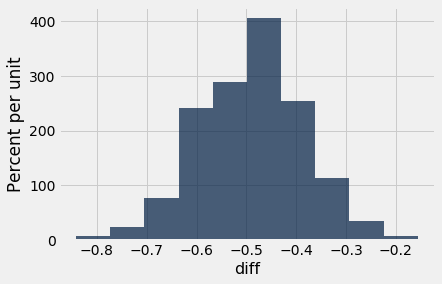

In [34]:
table = Table().with_column('diff', result)
table.hist()

#### Question 5
Do you accept or reject your null hypothesis?  Looking at your results, is there strong evidence that there is a big difference between the means of the two groups?

拒绝原假设。

The study tracked many pieces of information about each individual.  The authors include the following table in their report, comparing diet-drinkers and non-diet-drinkers on various traits.  The traits were measured at the *start* of the 7-8 year observational period.

<img src="factors.gif"/>

#### Question 6
Using this table, Steve the Scientist makes the following argument:

> "People who drank diet drinks were much more likely (12.1% versus 33.4%) to say they were dieting at the start of the observational period.  So perhaps drinking diet drinks does not directly cause weight gain.  Instead, the association we observed in question 5 could be caused entirely by this confounding factor."

Is this a valid argument?

合理的。

## 2. How to Avoid Road Rage with Bayes Rule


You are sitting in your car in heavy traffic, and another car rudely cuts in front of you!  Two hypotheses occur to you:

1. The driver is an ordinary person who happens to be having a bad day.
2. The driver is an irredeemable jerk.

You guess that 1% of drivers are irredeemable jerks.  Reflecting on your own driving habits, you guess that 2% of the time heavy traffic makes you frustrated enough to drive rudely, and you think most ordinary people behave similarly.  By contrast, you guess that irredeemable jerks behave rudely 50% of the time.

#### Question 1
Draw a tree diagram describing this situation.

*To complete the tree, replace the underscores in the tree skeleton below with probabilities or labels as appropriate.  (If you've printed this, just write in the text.)*


                  /\
                 /  \
            1% /    \ 99%
               /      \
            jerks     ordinary person 
            / \50%     / \
       50% /   \   2%/   \ 98%
       rudely   ord  rudely ord

#### Question 2
What is the chance that any given driver you encounter in heavy traffic is an ordinary person *and* that person is rude to you?

In [35]:
(0.99*0.02)/(0.99*0.02 + 0.01*0.5)

0.7983870967741935

#### Question 3
Under these assumptions, what is the chance that any given driver you encounter in heavy traffic is rude to you?

In [36]:
(0.99* 0.02)/(0.99* 0.02 + 0.01*0.5)

0.7983870967741935

From your answers to questions 2 and 3, you should find that more than half the people who are rude in heavy traffic are not actually jerks.  Let's quantify that.

#### Question 4
What is the chance that the driver who cut in front of your car is an ordinary person who happens to be having a bad day?

In [37]:
(0.99*0.02)/(0.99*0.02 + 0.01*0.5)

0.7983870967741935

## 3. Marginal Histograms


Consider the following scatter plot: ![](scatter.png)

The axes of the plot represent values of two variables: $x$ and $y$. 

Suppose we have a table called `t` that has two columns in it:

- `x`: a column containing the x-values of the points in the scatter plot
- `y`: a column containing the y-values of the points in the scatter plot

**Question 1:** Match each of the following lines of code to the histograms they produce. Explain your reasoning.

**Line 1:** `t.hist('x')` 

**Line 2:** `t.hist('y')`

**Histogram A:** ![](var1.png)
**Histogram B:** ![](var2.png)

**Histogram for Line 1:** b

**Explanation:**有一个区域内有很多点

**Histogram for Line 2:**  a

**Explanation:** 有一个区域内没有点

## 4. A Potpourri of Tests


#### Question 1
Many scientific disciplines use 5% as a standard cutoff for rejecting the null hypothesis when conducting hypothesis tests.  Suppose for sake of argument that every scientific paper hinges on exactly one hypothesis test with a 5% cutoff.  After learning about hypothesis testing, Thomas despairs about the state of scientific research, wondering:

> "Doesn't this mean that 5% of all scientific papers are wrong?"

Give one reason why Thomas's worry isn't quite accurate.

发生该事情的概率为5%

#### Question 2
Many scientists hope to make exciting and unintuitive discoveries.  Often the null hypothesis in an hypothesis test is something boring ("the sky is blue"), while the alternative is surprising ("the sky is not blue!").

Suppose a scientist has an exciting but incorrect idea, so that their null hypothesis is *truly correct*.  When an hypothesis test is run on a sample of data, it fails to reject the null when using a 5% cutoff.  Disappointed but determined, the scientist gathers 10 more samples and runs the same test on each sample (running 10 separate hypothesis tests, each with a 5% cutoff).  If any of the tests rejects the null, the scientist publishes that one.  What is the chance that any of those tests rejects the null hypothesis?

0.05+0.95 *0.05

**Note:** The scientist in this scenario is acting very unethically, but (probably milder) forms of this [*publication bias*](https://en.wikipedia.org/wiki/Publication_bias) seem to be a real problem in science today.

#### Question 3
Explain one advantage and one disadvantage of using a very high confidence level like 99.9999% when computing a confidence interval.  Describe a situation where you would advise using such a high confidence level.

拒绝的一定是错的，但是大部分都是正确的。

## 5. Review of Prediction Intervals


When using sampled data to perform regression for the purposes of prediction, we would like to have a notion of uncertainty for our prediction. The standard way to quantify uncertainty is with a confidence interval. In this exercise, we will be reviewing [prediction intervals](https://www.inferentialthinking.com/chapters/14/3/prediction-intervals.html). 

The cell below loads a few functions that will be useful for answering these questions. You should review the code provided to make sure you understand what each function is doing.

The next cell down loads and plots a cloud of points. We will be generating prediciton intervals for this point cloud

In [38]:
def standard_units(a):
    return (a - np.mean(a))/np.std(a)

def correlation(t):
    x_standard = standard_units(t.column(0))
    y_standard = standard_units(t.column(1))
    return np.mean(x_standard*y_standard)

def slope(t):
    r = correlation(t)
    return r*(np.std(t.column(1))/np.std(t.column(0)))

def intercept(t):
    s = slope(t)
    return np.mean(t.column(1)) - (s * np.mean(t.column(0)))

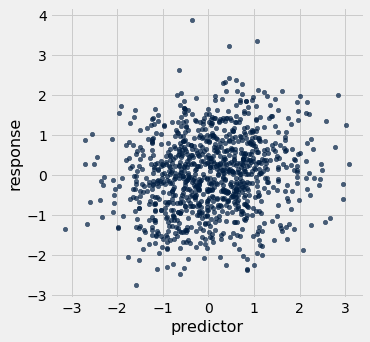

In [39]:
cloud = Table.read_table('cloud.csv')
cloud.scatter('predictor')

**Question 1:** Write a function that:

- takes in a table and an x value
- returns the regression estimate of the y value corresponding to that x

*Hint:* You may use the functions defined above

In [42]:
def predict(t, x):
    m = slope(t)
    b = intercept(t)
    return m*x + b

**Question 2:** Write a function that

- takes in a table and an x value
- returns an array of bootstrapped regression estimates for that x value

The function should perform 1000 replications of the bootstrap.

In [43]:
def bootstrap_predictions(t, x):
    predictions = np.array([])
    for i in range(1000):
        t_sampled = t.sample()
        prediction = predict(t, x)
        predictions = np.append(predictions, prediction)
    return predictions

predictions_array = bootstrap_predictions(cloud, 0)

**Question 3:** Using your array of predictions from the previous question, fill in the code to come up with a bootstrapped 95% confidence interval for our prediction. 

In [44]:
lower = percentile(0.025, predictions_array)
upper = percentile(0.975, predictions_array)

print("95% confidence interval for prediction at 0: ({0}, {1})".format(lower, upper))

95% confidence interval for prediction at 0: (0.0065917065620758495, 0.0065917065620758495)


**Question 4:** Consider the vertical slice of the above scatter plot at $X = 0$. Do 95% of the point on that slice appear to fall within the 95% confidence interval? If not, provide an interpretation of the 95% prediction interval.

不在，之前的95%置信区间是指在线性假设下的区间。

## 6. Detecting Spam


Suppose you work at a large email provider (like Google or Microsoft).  Spam is a huge problem, so you're tasked with classifying emails as spam or not spam.  This exercise is about some statistical questions that come up when you test your spam classifier.

You have access to the entire population of emails from your users, numbering in the billions.  However, manually labeling an email as spam or not spam is a labor-intensive process, so you select just 100 emails uniformly at random, read through them, and figure out whether each one is spam or not.  (You would be correct to worry that this is a violation of your users' privacy, but let's put that aside for this exercise.)  You identify a bunch of numerical features of an email to use as attributes: the number of dollar signs (\$) in the email, the number of capital letters, the number of times the receiver has replied to the sender, etc.

You use 80 emails as a training set and hold out the other 20 as a test set.  You train a 3-NN classifier on the training set.  You name this classifier **Bob**.  Bob correctly classifies 78 of the 80 emails in the training set and 17 of the 20 emails in the test set.

#### Question 1
Suppose you could test Bob on the entire population.  We'll use `bob_population_accuracy` as the name for the proportion of emails in the population Bob correctly classifies.  Would `bob_population_accuracy` be exactly $78/80$, exactly $17/20$, exactly some other number we haven't listed, or can you not say exactly what it would be without more information?

不一定。

#### Question 2
Suppose you repeat the whole process 1,000,000 times:
* sampling 100 emails uniformly at random from the population,
* labeling them,
* training a new 3-NN classifier (*not* Bob) on 80 of those emails,
* and checking its accuracy on the remaining 20 emails.

Then you compute the average of those 1,000,000 accuracies.  Will it be roughly equal to `bob_population_accuracy`?  If not, give a succinct description of the value you computed.  (If you use more than 20 words, it's probably not succinct.)

是的。

#### Question 3
Suppose you repeated a slightly different process 1,000,000 times:
* sampling 20 emails uniformly at random from the population,
* labeling them,
* and checking Bob's accuracy on them.

Then you compute the average of those 1,000,000 accuracies.  Will it be roughly equal to `bob_population_accuracy`?  If not, give a succinct description of the value you computed.  (If you use more than 20 words, it's probably not succinct.)

不是，这个计算的不是测试误差。

#### Question 4
Given only your single sample of 100 emails, describe how you would use the bootstrap to generate a 90% confidence interval for `bob_population_accuracy`.

重复Question 2的实验多次。

In [45]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [tests.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")

Running all tests...
Finished running all tests.
